In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# for unzip
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Data.zip" # path where file located
with ZipFile(file_name,'r') as zip: # r for read
  zip.extractall()
  print('finish')
  

finish


In [5]:
!ls '/content/drive'


MyDrive  Shareddrives


In [6]:
#Give dataset path
train_path = '/content/Data/train'
test_path = '/content/Data/validation'

Working with 2511 images
Image examples: 
8913_idx5_x1901_y1351_class0.png


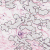

8914_idx5_x1551_y801_class0.png


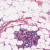

8913_idx5_x1201_y1851_class0.png


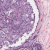

8914_idx5_x751_y2901_class0.png


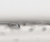

8913_idx5_x2851_y501_class0.png


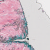

8914_idx5_x251_y1001_class0.png


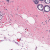

8914_idx5_x2651_y1851_class0.png


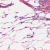

8914_idx5_x3251_y2901_class0.png


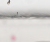

8914_idx5_x1851_y1651_class0.png


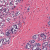

8913_idx5_x701_y1501_class0.png


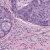

In [7]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/X'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [8]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [9]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [10]:
for layer in vgg.layers:
  layer.trainable = False

In [11]:
folders = glob('/content/Data/train/*')
print(len(folders))

2


In [12]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(Adam(lr=0.0001)loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [15]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [16]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5022 images belonging to 2 classes.


In [17]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5022 images belonging to 2 classes.


In [19]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='TL_model.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
5/5 - 595s - loss: 2.4596 - accuracy: 0.7750 - val_loss: 2.8443 - val_accuracy: 0.7637

Epoch 00001: val_loss improved from inf to 2.84432, saving model to TL_model.h5
Epoch 2/10
5/5 - 594s - loss: 2.2017 - accuracy: 0.8000 - val_loss: 2.4190 - val_accuracy: 0.8027

Epoch 00002: val_loss improved from 2.84432 to 2.41896, saving model to TL_model.h5
Epoch 3/10
5/5 - 592s - loss: 1.5387 - accuracy: 0.8687 - val_loss: 1.5637 - val_accuracy: 0.8350

Epoch 00003: val_loss improved from 2.41896 to 1.56374, saving model to TL_model.h5
Epoch 4/10
5/5 - 591s - loss: 1.8924 - accuracy: 0.8125 - val_loss: 1.8228 - val_accuracy: 0.7969

Epoch 00004: val_loss did not improve from 1.56374
Epoch 5/10
5/5 - 591s - loss: 1.9991 - accuracy: 0.7812 - val_loss: 1.2307 - val_accuracy: 0.8408

Epoch 00005: val_loss improved from 1.56374 to 1.23066, saving model to TL_model.h5
Epoch 6/10
5/5 - 591s - loss: 1.2613 - accuracy: 0.8000 - val_loss: 1.2610 - val_accuracy: 0.8350

Epoch 00006: val_loss d

In [ ]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()